In [1]:
 # Librairies de manipulation de données
import pandas as pd
import numpy as np
import scipy as sp

# Librairies graphiques
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import matplotlib.image as image
import cv2                  #To display an image using opencv cv2 library
import matplotlib.cbook as cbook
import matplotlib as mpl
import seaborn as sns
from textwrap import wrap

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)  
pd.set_option('display.max_colwidth',None)

In [2]:
import nltk
#nltk.download()
import string as st
import re
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict  # For word frequency
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

In [3]:

import gensim
import os

In [4]:

import csv

from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier

In [5]:
!pip install --upgrade kneed
from kneed import KneeLocator
import random
import math
import sys
import shutil
from datetime import datetime
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score, accuracy_score, confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from PIL import Image, ImageOps, ImageFilter


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from google.colab import files
 
uploaded = files.upload()

Saving flipkart_com-ecommerce_sample_1050.csv to flipkart_com-ecommerce_sample_1050.csv


In [9]:
#!unzip Data.zip

In [10]:
df=pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [11]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=>""Sathiyas cotton bath towel""}, {""key""=>""Ideal For"",

In [12]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [13]:
df['image'].nunique()

1050

In [14]:
df['image'][1]

'7b72c92c2f6c40268628ec5f14c6d590.jpg'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [16]:
len(df['image'])

1050

In [17]:
df_train = df.loc[:, ["image", "product_category_tree"]]

In [18]:
len(os.listdir("/content/drive/MyDrive/PROJET 6/Images/"))

1050

In [19]:
df['cat_1'] = df['product_category_tree'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df['cat_1']

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: cat_1, Length: 1050, dtype: object

In [20]:
# On crée une liste de strings en supprimant les >>
df = df_train["product_category_tree"].str.split(">>")

# Et on ne récupère que la deuxième valeur de la liste
# Ce qui correspondra à notre catégorie de produits
df_train["cat_1"] = df.apply(lambda x: x[0])

In [21]:
def chemin_complet(image):
    
    # Cette fonction permet de reformater le champs image
    # afin d'avoir le chemin complet dans le but de les
    # charger plus facilement
    
    image = "/content/drive/MyDrive/PROJET 6/Images/" + image
    
    return image

In [22]:
# On repart de notre dataframe df_train + colonne "image"

# On reformate la colonne image 

df_train["image"] = df_train["image"].apply(chemin_complet)


df_train.head()

,image,product_category_tree,cat_1
0,/content/drive/MyDrive/PROJET 6/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","[""Home Furnishing"
1,/content/drive/MyDrive/PROJET 6/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]","[""Baby Care"
2,/content/drive/MyDrive/PROJET 6/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]","[""Baby Care"
3,/content/drive/MyDrive/PROJET 6/Images/d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]","[""Home Furnishing"
4,/content/drive/MyDrive/PROJET 6/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]","[""Home Furnishing"


In [23]:
from google.colab import files
from IPython.display import Image


In [24]:
#os.listdir("/content/drive/MyDrive/PROJET 6/Images")

In [25]:
path = "/content/drive/MyDrive/PROJET 6/Images"
list_photos = [file for file in os.listdir(path)]
print(len(list_photos))

1050


In [26]:
type(list_photos)

list

In [27]:
list_photos[18]

'ed9817e8960a6a0d509061c54cfe5ac1.jpg'

In [28]:
#list_photos

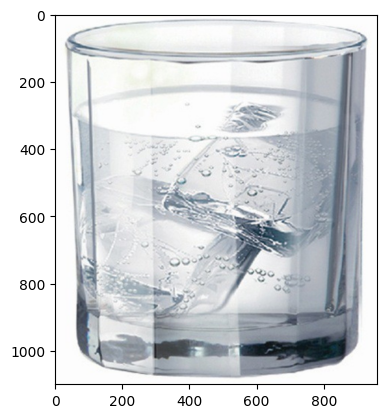

In [29]:

plt.style.use('default')
imge = plt.imread("/content/drive/MyDrive/PROJET 6/Images/0b852704f2002f8865a68818ad4951da.jpg")
# Afficher l'image chargée
plt.imshow(imge) 

In [30]:

# informations
print( 'classe :', type(imge) )
print( 'type :', imge.dtype )
print( 'taille :', imge.shape )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (1100, 958, 3)


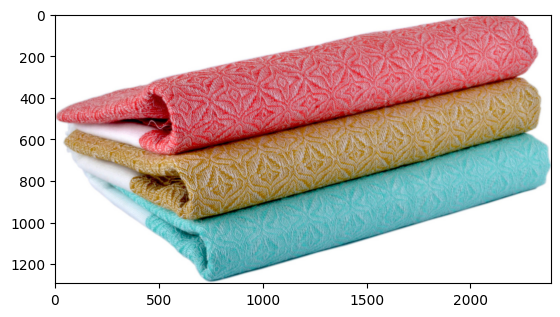

In [31]:
plt.style.use('default')
img = plt.imread(df_train["image"][1])
# Afficher l'image chargée
plt.imshow(img) 

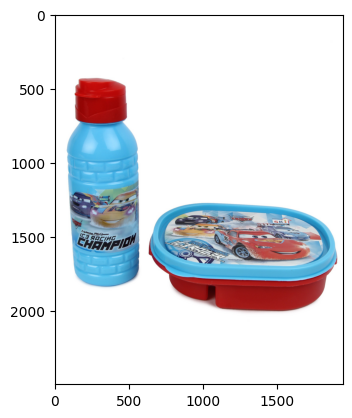

In [32]:
plt.style.use('default')
img = plt.imread("/content/drive/MyDrive/PROJET 6/Images/ed9817e8960a6a0d509061c54cfe5ac1.jpg")
# Afficher l'image chargée
plt.imshow(img)

[     0      0      0      0      0      1      0      1      0      3
      4      6      6     11     21     47     63     82    138    220
    315    386    424    430    439    468    523    535    496    510
    565    504    509    480    445    469    504    459    441    398
    363    374    327    324    284    272    224    222    230    233
    203    220    236    233    221    225    239    224    210    196
    235    218    251    297    360    452    489    531    541    544
    533    587    652    655    629    653    622    594    577    546
    582    572    631    602    687    758    842    882    801    792
    750    778    805    770    806    778    799    894    952   1001
   1218   1396   1542   1695   1826   1884   1781   1713   1544   1601
   1494   1486   1415   1406   1368   1338   1416   1392   1414   1480
   1394   1439   1586   1608   1622   1649   1841   1953   2176   2297
   2525   2638   2703   2651   2588   2585   2557   2547   2717   2720
   289

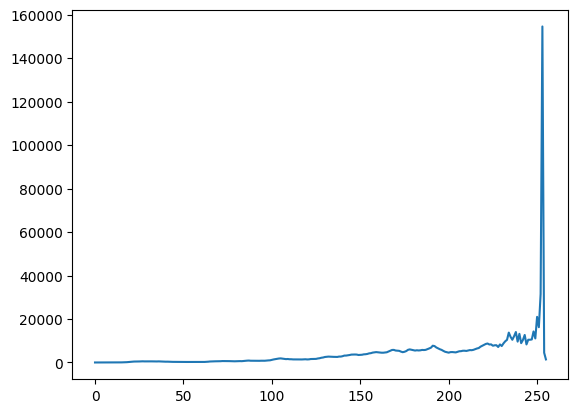

In [33]:
# Convertit l'image en niveaux de gris Y
imge = cv2.imread('/content/drive/MyDrive/PROJET 6/Images/0b852704f2002f8865a68818ad4951da.jpg')
b,v,r = cv2.split(imge)         # récupère 3 matrices d'octets séparées
y = 0.299*r + 0.587*v + 0.114*b # opération matricielle
y = y.astype(np.uint8)          # convertit les réels en octets

# Calcule l'histogramme de l'image
hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
for i in range(0,imge.shape[0]):      # énumère les lignes
    for j in range(0,imge.shape[1]):  # énumère les colonnes
          hist[y[i,j]] = hist[y[i,j]] + 1

print(hist)
plt.plot(hist)
plt.show()

In [34]:
df.head(2)

0                             [["Home Furnishing ,  Curtains & Accessories ,  Curtains ,  Elegance Polyester Multicolor Abstract Eyelet Do..."]]
1    [["Baby Care ,  Baby Bath & Skin ,  Baby Bath Towels ,  Sathiyas Baby Bath Towels ,  Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]]
Name: product_category_tree, dtype: object

## <b> Extract keypoints from each image:<b>

- Loading  photos containing images
- Remove background
- Convert to grayscale
- Apply histogram equalization
- Extract image features with help of ORB


####<b> Computing descriptors :<b>

#####<b> Détermination et affichage des descripteurs SIFT : <b>

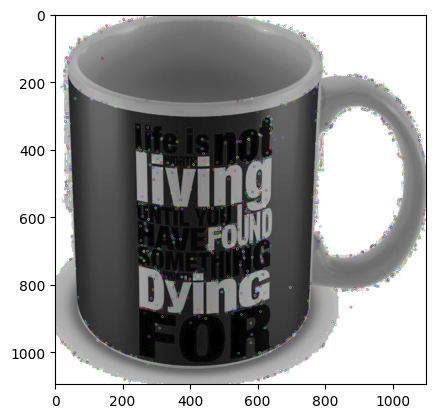

Descripteurs :  (1287, 128)

[[126.  75.   1. ...   0.   0.   2.]
 [ 28.   3.   0. ...   0.   0.   0.]
 [ 51.  94.   2. ...   0.   0.   1.]
 ...
 [ 19. 118.   3. ...   4.  35.  40.]
 [ 79.   0.   0. ...   0.   0.   3.]
 [135.  65.   0. ...   5.   6.  13.]]


In [35]:
#import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+"/"+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## <b> Convolutionnal Neural Network :<b>

### <b>VVG-16:<b>

In [36]:
# example of using the vgg16 model as a feature extraction model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from pickle import dump
import numpy as np


####<b> Extraction des features: Exemples <b>

In [37]:
# load an image from file
image = load_img("/content/drive/MyDrive/PROJET 6/Images/fffa2117a4006d4a848eb7d5b80d4816.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
print(features.shape)

553476096/553467096 [==============================] - 3s 0us/step
(1, 4096)


In [38]:
# load an image from file
image = load_img("/content/drive/MyDrive/PROJET 6/Images/9cd443dad2c8f354fd01869a57fdc171.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
print(features.shape)

(1, 4096)


In [39]:

#model = VGG16(weights='imagenet', include_top=False)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

img_path = "/content/drive/MyDrive/PROJET 6/Images/9cd443dad2c8f354fd01869a57fdc171.jpg"
img = load_img(img_path, target_size=(224, 224))
img_data = img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [40]:
len(df_train["image"])

1050

In [41]:
list_img=df_train["image"].unique()

In [42]:
len(list_img)

1050

### <b> Extraction des features de toutes les images: <b>

In [43]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

vgg16_feature_list = []
#path = "/content/drive/MyDrive/PROJET 6/Images/"
for imge in list_img:   
    img = load_img(imge, target_size=(224, 224))
    img = img_to_array(img)
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())
        
vgg16_feature_list_np = np.array(vgg16_feature_list)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [44]:
print("Dimension vecteur par image :", len(vgg16_feature_list_np[0]))
print("Nombre total de vecteurs :", len(vgg16_feature_list_np))

Dimension vecteur par image : 4096
Nombre total de vecteurs : 1050


In [45]:
X=vgg16_feature_list_np

In [46]:
df_train["features_VGG16"] = ""

for i in range(df_train.shape[0]):
    df_train["features_VGG16"][i] = X[i]

In [47]:
df_train.head(1)

,image,product_category_tree,cat_1,features_VGG16
0,/content/drive/MyDrive/PROJET 6/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]","[""Home Furnishing","[3.398615, 0.8595723, 0.0, 1.1065596, 2.2661214, 2.9272418, 2.4464478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55927837, 0.0, 0.0, 0.0, 0.24602947, 1.0128089, 4.7234273, 0.0, 0.0, 0.0, 1.5270767, 0.0, 1.4752927, 0.7278056, 0.0, 0.0, 0.0, 1.1228385, 0.0, 0.0, 0.0, 3.4084241, 1.0944984, 1.4979167, 0.0, 0.0, 2.367992, 2.3720846, 0.0, 2.9849334, 0.0, 6.419507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0671296, 0.0, 0.0, 0.0, 0.0, 1.5770037, 0.0, 0.0, 3.2868917, 0.89142656, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0081778765, 0.0, 0.0, 1.9534988, 0.0, 1.8672745, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6881168, 0.0, 0.0, 0.75787944, 0.0, 0.0, 2.7029576, 0.0, 0.0, 2.0773196, ...]"


In [48]:
df_train_img=df_train[["cat_1", "features_VGG16"]]

In [49]:
df_train_img.head(1)

,cat_1,features_VGG16
0,"[""Home Furnishing","[3.398615, 0.8595723, 0.0, 1.1065596, 2.2661214, 2.9272418, 2.4464478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.55927837, 0.0, 0.0, 0.0, 0.24602947, 1.0128089, 4.7234273, 0.0, 0.0, 0.0, 1.5270767, 0.0, 1.4752927, 0.7278056, 0.0, 0.0, 0.0, 1.1228385, 0.0, 0.0, 0.0, 3.4084241, 1.0944984, 1.4979167, 0.0, 0.0, 2.367992, 2.3720846, 0.0, 2.9849334, 0.0, 6.419507, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0671296, 0.0, 0.0, 0.0, 0.0, 1.5770037, 0.0, 0.0, 3.2868917, 0.89142656, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0081778765, 0.0, 0.0, 1.9534988, 0.0, 1.8672745, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6881168, 0.0, 0.0, 0.75787944, 0.0, 0.0, 2.7029576, 0.0, 0.0, 2.0773196, ...]"


In [50]:
print(X)

[[3.398615   0.8595723  0.         ... 0.         0.8510543  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.2971003  0.         0.        ]
 ...
 [2.1961303  2.3982742  2.62364    ... 2.1598725  0.18472248 0.        ]
 [0.         0.         0.         ... 0.         0.24832991 0.92513794]
 [0.         0.         0.12313202 ... 0.         0.52771646 2.9917486 ]]


####<b> Kmeans clustering :<b>

In [51]:
from sklearn.cluster import KMeans
from termcolor import colored, cprint
from sklearn.metrics import adjusted_rand_score, rand_score, silhouette_score, confusion_matrix
import time


time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
km.fit(X)
cprint("Adjusted Rand Index: %.3f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))

Adjusted Rand Index: 0.469
time :  42.0


### <b> Dimension reduction:<b>

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn import manifold, decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def display_scree_plot(pca, dpi=100):
    """ Affiche le graphique des éboulis des valeurs propres 
    et le critère de Kaiser
    On utilise le code de Nicolas Rangeon (avec qques modifications)
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - pca : sklearn.decomposition.PCA
    - dpi : résolution du tracé matplotlib.
    Returns : 
    - graphique matplotlib
    """
    scree = pca.explained_variance_ratio_ * 100
    plt.style.use('seaborn')
    plt.figure(edgecolor='black', linewidth=4, dpi=dpi)
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.axhline(100 / pca.n_features_,
                0,
                len(pca.components_) + 1,
                c='green',
                linewidth=0.6)  # critère de Kaiser
    plt.show(block=False)


def display_circles(pca,
                    axis_ranks,
                    labels=None,
                    label_rotation=0,
                    lims=None,
                    size_nom_variable=18):
    """ Affiche les cercles des corrélation pour les plan factoriels.
    On utilise le code de Nicolas Rangeon (avec qques modifications) 
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - pca : sklearn.decomposition.PCA
    - axis_ranks : liste des plans factoriel à tracer. 
    Exemple :  [(0,1), (2,3)] pour tracer les deux premiers plans.
    - labels : liste de nom des variables.
    - label_rotation : rotation (degrés) de l'affichage des labels.
    - lims : 'auto' ou 'None' ou tuple (xmin, xmax, ymin, ymax)
    des limites du tracé.
    - size_nom_variable : taille de l'affichage  des variables projetées.
    Returns : 
    - affiche une figure matplotlib.
    """
    n_comp = pca.n_components_
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            plt.style.use('seaborn')
            plt.figure(edgecolor='black', linewidth=4, figsize=(10, 10))

            # détermination des limites du graphique
            pcs = pca.components_
            if lims == 'auto':
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(
                    pcs[d2, :]), max(pcs[d2, :])
            elif lims is not None:  # lims est un tuple
                xmin, xmax, ymin, ymax = lims
            else:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]),
                           np.zeros(pcs.shape[1]),
                           pcs[d1, :],
                           pcs[d2, :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color="grey",
                           width=0.001)

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x,
                                 y,
                                 labels[i],
                                 fontsize=str(size_nom_variable),
                                 ha='center',
                                 va='center',
                                 rotation=label_rotation,
                                 color="blue",
                                 alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.axis('square')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.show()


def display_factorial_planes(X_projected,
                             pca,
                             axis_ranks,
                             labels=None,
                             size=5,
                             alpha=1,
                             illustrative_var=None):
    """ Affiche les objets (i.e. les lignes du dataset) 
    sur les plan factoriels.
    On utilise le code de Nicolas Rangeon (avec qques modifications) 
    disponible ici :
    https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-
    exploratoire-de-donnees/5345201-tp-realisez-une-acp
    Args :
    - X_projected : array numpy contenant les données (X) après scaling et 
    projection : X_projected = pca.transform(X_scaled)
    - pca : sklearn.decomposition.PCA
    - axis_ranks : liste des plans factoriel à tracer. 
    Exemple :  [(0,1), (2,3)] pour tracer les deux premiers plans.
    - labels : liste de nom des objets.
    - alpha : alpha ("transparence").
    - illustrative_var : variable catégorielle (série pandas avec 
    même nombre d'objets que X_projected) ; ajout d'une couleur sur le 
    tracé pour chaque valeur de la variable.
    Returns : 
    - affiche une figure matplotlib.
    """
    n_comp = pca.n_components_

    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            plt.figure(edgecolor='black', linewidth=4, figsize=(7, 6))

            # affichage des points
            if illustrative_var is None:
                plt.style.use('seaborn')
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha, s=size)
            else:
                plt.style.use('default')
                from matplotlib import rcParams
                from cycler import cycler
                rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha, s=size,
                                label=value)
                plt.legend(markerscale=3, frameon=False)

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x + 0.1,
                             y + 0.1,
                             labels[i],
                             fontsize='12',
                             ha='center',
                             va='center')

            # détermination des limites du graphique
            xmin = np.min(X_projected[:, d1])
            xmax = np.max(X_projected[:, d1])
            xdelta = xmax - xmin
            ymin = np.min(X_projected[:, d2])
            ymax = np.max(X_projected[:, d2])
            ydelta = ymax - ymin
            plt.xlim(xmin - 0.02 * xdelta, xmax + 0.02 * xdelta)
            plt.ylim(ymin - 0.02 * ydelta, ymax + 0.02 * ydelta)

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection (sur F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


def draw_tsne(X, perplexites, illustrative_var, color='bgrcmyk', dpi=100):
    """ Visualisation t-SNE en 2 dimensions, avec ajout de labels de couleurs sur les données.
    Args :
    - X : ndarray of shape (n_samples, n_features), la data à réduire par le t-SNE.
    - perplexites : liste de perplexités à tracer.
    - illustrative_var : série de longueur n_samples avec les labels de la data
    - color : couleurs utilisées pour la légende.
    - dpi : résolution du tracé matplotlib.
    Returns :
    - void (tracé matplotlib).
    """
    from cycler import cycler
    from matplotlib import rcParams
    from sklearn import manifold

    rcParams['axes.prop_cycle'] = cycler(color=color)

    for perplexity in perplexites:
        plt.figure(edgecolor='black', linewidth=4, figsize=(6, 6), dpi=dpi)
        tsne = manifold.TSNE(
            n_components=2, random_state=0, perplexity=perplexity)
        data_reduced_tsne = tsne.fit_transform(X)
        illustr_var = np.array(illustrative_var)
        for value in np.unique(illustr_var):
            selected = np.where(illustr_var == value)
            plt.scatter(
                data_reduced_tsne[selected, 0], data_reduced_tsne[selected, 1], s=4, label=value)
        plt.title('PLONGEMENT t-SNE - perplexité = ' +
                  str(perplexity), fontsize=10)
        plt.legend(markerscale=3, frameon=True, fontsize=7)
        plt.show()

#Cellule de code <undefined>
##%% [code]




In [53]:
X=vgg16_feature_list_np

Dimensions dataset avant PCA :  (1050, 4096)
Dimensions dataset après PCA :  (1050, 850)


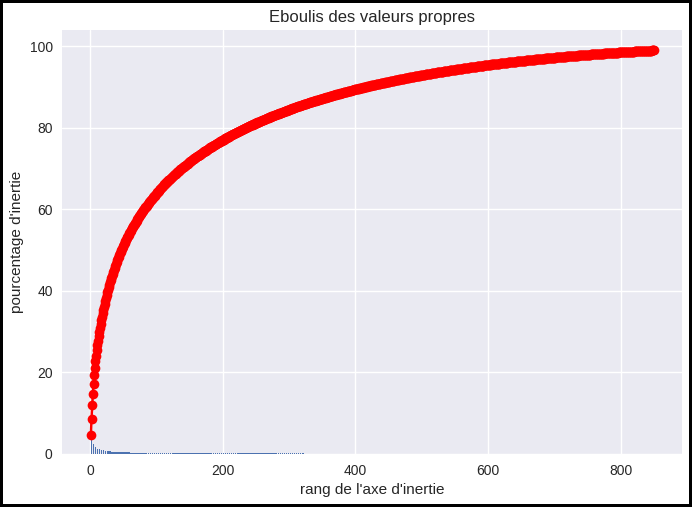

In [54]:
print("Dimensions dataset avant PCA : ", X.shape)
pca = decomposition.PCA(n_components=0.99)
#X_dense = csr_matrix.todense(X)   # convertit une sparse matrix en dense matrix
#X_dense = csr_matrix.todense(tfidf_vect)   # convertit une sparse matrix en dense matrix
X_scaled = StandardScaler().fit_transform(X)   # données normalisées
feat_pca = pca.fit_transform(X_scaled)
print("Dimensions dataset après PCA : ", feat_pca.shape)
display_scree_plot(pca)


In [55]:

time1 = time.time()
km = KMeans(n_clusters=7, init='k-means++', max_iter=1000, n_init=100)
km.fit(feat_pca)
cprint("Adjusted Rand Index: %.3f" %
      adjusted_rand_score(df_train['cat_1'], km.labels_), 'red')
time2 = np.round(time.time() - time1,0)
print("time : ", time2)
#print("Rand Index: %.2f" % rand_score(df_train['cat_1'], km.labels_))


Adjusted Rand Index: 0.494
time :  15.0


In [56]:
len(df_train['cat_1'])

1050

In [57]:
len(km.labels_)

1050

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


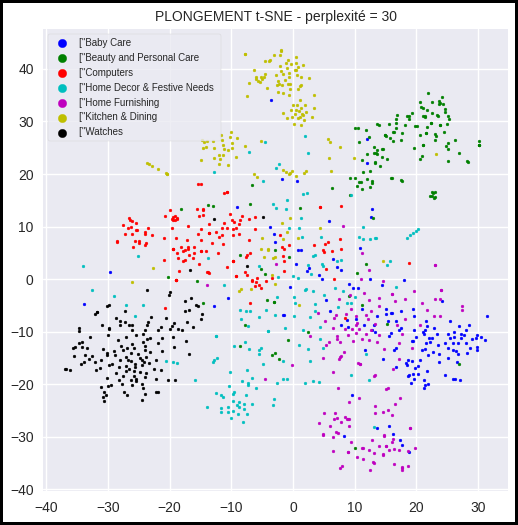

In [58]:
perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca, perplexities, df_train['cat_1'])

In [59]:
df_train['cluster']=km.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


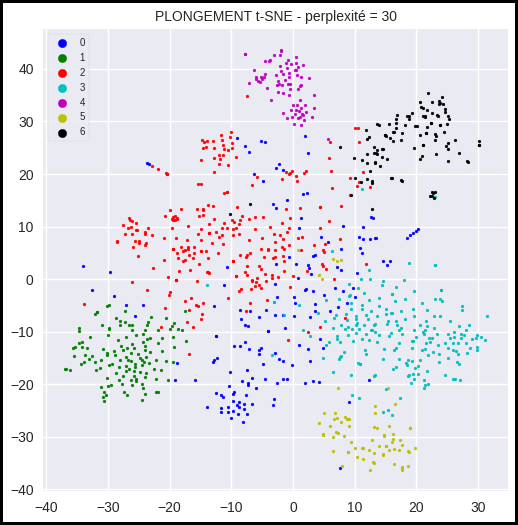

In [60]:
perplexities = [30]
plt.style.use('seaborn')
draw_tsne(feat_pca, perplexities, df_train['cluster'])

In [61]:
for i in np.unique(km.labels_):
#for i in km.labels_.unique():
    print("Cluster", i)
   # print("Center:", km.cluster_centers_[i])
    print("Size:", sum(km.labels_ == i))
    

Cluster 0
Size: 164
Cluster 1
Size: 133
Cluster 2
Size: 273
Cluster 3
Size: 214
Cluster 4
Size: 78
Cluster 5
Size: 73
Cluster 6
Size: 115


####<b>  Matrice de confusion :<b>

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["cat_encoded"] = le.fit_transform(df_train["cat_1"])


In [63]:
labels =df_train["cat_encoded"]

In [64]:
labels.shape

(1050,)

In [65]:
df_tri_cat = df_train.sort_values(by="cat_encoded")

In [66]:
df_tri_cat.shape

(1050, 6)

In [67]:
df_train["cluster"]=km.labels_

In [68]:
print(df_train["cluster"].shape)

(1050,)


In [69]:
df_train["cluster"].head()

0    5
1    3
2    3
3    3
4    5
Name: cluster, dtype: int32

In [70]:
cm = confusion_matrix(labels, km.labels_)
cm
cm_argmax = cm.argmax(axis = 0)
cm_argmax
y_pred_ = np.array([cm_argmax[i] for i in km.labels_])
cm_ = confusion_matrix(labels,km.labels_ )
cm_

array([[ 11,   0,  12, 112,   1,  11,   3],
       [  7,   0,  26,   9,   0,   1, 107],
       [  3,   0, 144,   2,   0,   0,   1],
       [126,   2,  13,   5,   0,   3,   1],
       [  7,   0,   0,  85,   0,  58,   0],
       [  9,   0,  60,   1,  77,   0,   3],
       [  1, 131,  18,   0,   0,   0,   0]])

Text(0.5, 47.7222222222222, 'Clusters')

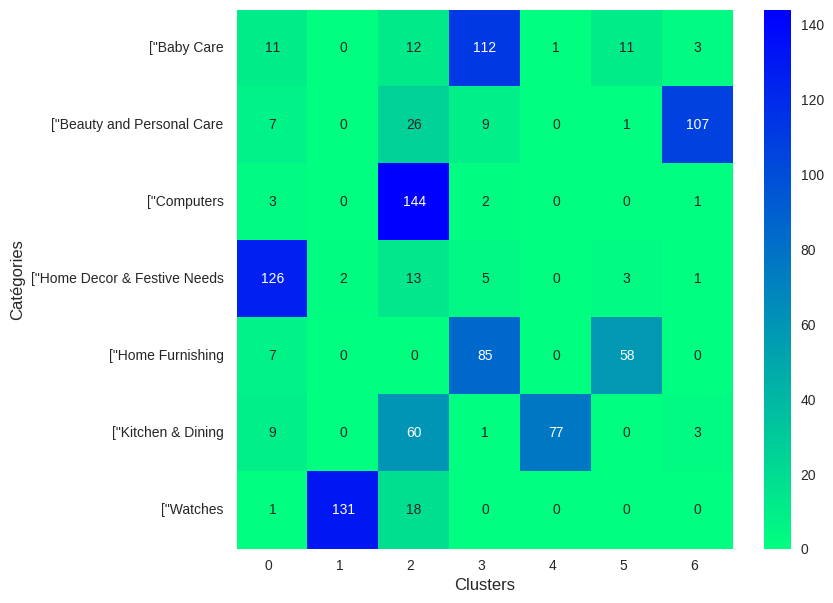

In [71]:
df_cm = pd.DataFrame(cm_, 
                     index=df_tri_cat["cat_1"].unique(), 
                     columns=np.unique(y_pred_)
                    )

fig = plt.figure(figsize=(8,7))

try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='winter_r')
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
    
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
plt.ylabel("Catégories", size=12)
plt.xlabel("Clusters", size=12)
#/np.sum(cf_matrix)


In [72]:
print(df_tri_cat["cat_1"].unique())

['["Baby Care ' '["Beauty and Personal Care ' '["Computers '
 '["Home Decor & Festive Needs ' '["Home Furnishing '
 '["Kitchen & Dining ' '["Watches ']


In [73]:
print(np.unique(y_pred_))

[0 1 2 3 4 5 6]


In [74]:
len(labels)

1050

In [75]:
categories = df_train["cat_1"]

In [76]:
categories.nunique()

7

In [77]:
labels = ["Beauty and Personal Care", "Computers", "Baby Care",
          "Home Decor", "Home Furnishing", "Kitchen", "Watches"]

In [78]:
categories.value_counts()

["Home Furnishing                150
["Baby Care                      150
["Watches                        150
["Home Decor & Festive Needs     150
["Kitchen & Dining               150
["Beauty and Personal Care       150
["Computers                      150
Name: cat_1, dtype: int64

In [79]:
# Regroupement des données par catégorie "cat_1"
df_tri_cat.groupby("cat_1").count()

,image,product_category_tree,features_VGG16,cluster,cat_encoded
cat_1,,,,,
"[""Baby Care",150,150,150,150,150
"[""Beauty and Personal Care",150,150,150,150,150
"[""Computers",150,150,150,150,150
"[""Home Decor & Festive Needs",150,150,150,150,150
"[""Home Furnishing",150,150,150,150,150
"[""Kitchen & Dining",150,150,150,150,150
"[""Watches",150,150,150,150,150


In [80]:
df_train.groupby("cat_encoded").count()

,image,product_category_tree,cat_1,features_VGG16,cluster
cat_encoded,,,,,
0,150,150,150,150,150
1,150,150,150,150,150
2,150,150,150,150,150
3,150,150,150,150,150
4,150,150,150,150,150
5,150,150,150,150,150
6,150,150,150,150,150


In [81]:
from sklearn import cluster, metrics
# classification report 

print(metrics.classification_report(df_tri_cat["cat_encoded"], km.labels_))

              precision    recall  f1-score   support

           0       0.14      0.15      0.15       150
           1       0.05      0.05      0.05       150
           2       0.25      0.45      0.32       150
           3       0.10      0.14      0.12       150
           4       0.03      0.01      0.02       150
           5       0.15      0.07      0.10       150
           6       0.07      0.05      0.06       150

    accuracy                           0.13      1050
   macro avg       0.11      0.13      0.11      1050
weighted avg       0.11      0.13      0.11      1050



In [82]:
df_train_desc=pd.read_csv('drive/MyDrive/PROJET 6/df_train_des.csv',index_col=0)

In [83]:
df_train_desc.head(1)

description  \
0  ['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in', 'the', 'morning', 'to', 'welcome', 'the', 'bright', 'sun', 'rays', 'you', 'want', 'to', 'wish', 'good', 'morning', 'to', 'the', 'whole', 'world', 'and', 'when', 'you', 'draw', 'them', 'close', 'in', 'the', 'evening', ',', 'you', 'create', 'the', 'most', 'special', 'moments', 'of', 'joyous', 'beauty', 'given', 'by', 'the', 'soothing', 'prints', '.', 'Bring', 'home', 'the', 'elegant', 'curtain', 'that', 'softly', 'filters', 'light', 'in', 'your', 'room', 'so', 'that', 'you', 'get', 'the', 'right', 'amount', 'of', 'sunlight.', ',', 'Specifications', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'General', 'Brand', 'Elegance', 'Designed', 'For', 'Door', 'Type', 'Eyelet', 'Model', 'Name', 'Abstract', 'Polyester', 'Door', 'Curtain', 'Set', 'Of', '2', 'Model', 'ID', 'Duster25', 'Color', 'Multicolor', 'Dimensions', 'Length', '213', 'cm', 'In', 'the', 'Box', 'Number', 'of', 'Contents', 'in', 'Sales', 'Package', 'Pack', 'of', '2', 'Sales', 'Package', '2', 'Curtains', 'Body', '&', 'Design', 'Material', 'Polyester']   

                                                                                              product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   

                cat_1  \
0  ["Home Furnishing    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 sentence_bow  \
0  key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrink

###<b> Assemblage des données textuelles et visuelles:<b> 

In [84]:
df_train_all=pd.merge(df_train_desc, df_train_img, on="cat_1", how = "inner")


In [85]:
df_train_all.head(1)

description  \
0  ['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in', 'the', 'morning', 'to', 'welcome', 'the', 'bright', 'sun', 'rays', 'you', 'want', 'to', 'wish', 'good', 'morning', 'to', 'the', 'whole', 'world', 'and', 'when', 'you', 'draw', 'them', 'close', 'in', 'the', 'evening', ',', 'you', 'create', 'the', 'most', 'special', 'moments', 'of', 'joyous', 'beauty', 'given', 'by', 'the', 'soothing', 'prints', '.', 'Bring', 'home', 'the', 'elegant', 'curtain', 'that', 'softly', 'filters', 'light', 'in', 'your', 'room', 'so', 'that', 'you', 'get', 'the', 'right', 'amount', 'of', 'sunlight.', ',', 'Specifications', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'General', 'Brand', 'Elegance', 'Designed', 'For', 'Door', 'Type', 'Eyelet', 'Model', 'Name', 'Abstract', 'Polyester', 'Door', 'Curtain', 'Set', 'Of', '2', 'Model', 'ID', 'Duster25', 'Color', 'Multicolor', 'Dimensions', 'Length', '213', 'cm', 'In', 'the', 'Box', 'Number', 'of', 'Contents', 'in', 'Sales', 'Package', 'Pack', 'of', '2', 'Sales', 'Package', '2', 'Curtains', 'Body', '&', 'Design', 'Material', 'Polyester']   

                                                                                              product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   

                cat_1  \
0  ["Home Furnishing    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 sentence_bow  \
0  key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrink

In [86]:
df_train_all.columns

Index(['description', 'product_category_tree', 'cat_1', 'sentence_bow',
       'Xvec_bow', 'cluster', 'TFidf_bow', 'sentence_bow_lem', 'Word2Vec',
       'sentence_dl', 'features_bert', 'features_USE', 'cat_encoded',
       'features_VGG16'],
      dtype='object')

In [87]:
df_train_all.drop(['sentence_bow','sentence_bow_lem','sentence_dl'], axis=1, inplace=True)

In [88]:
df_train_all.columns

Index(['description', 'product_category_tree', 'cat_1', 'Xvec_bow', 'cluster',
       'TFidf_bow', 'Word2Vec', 'features_bert', 'features_USE', 'cat_encoded',
       'features_VGG16'],
      dtype='object')